In [1]:
import spacy
import os
import numpy as np

nlp = spacy.load("en_core_web_sm")

In [2]:
def count_sentences_with_spacy(text):
    doc = nlp(text)
    sentences = list(doc.sents)
    sentence_count = len(sentences)

    return sentence_count


def count_main_clauses_with_spacy(text):
    # Process the text
    doc = nlp(text)
    
    # Initialize counters
    main_clauses = 0
    coordinate_clauses = 0
    subordinate_clauses = 0
    
    # Iterate over sentences in the document
    for sentence in doc.sents:
        # Look for finite verbs in the sentence
        for token in sentence:
            if token.pos_ == "VERB":
                # Check if this verb is the root of the sentence (indicating a main clause)
                if token.dep_ == "ROOT":
                    main_clauses += 1
                # Check for coordination (indicating a coordinate clause)
                elif token.dep_ == "conj" and token.head.pos_ == "VERB":
                    coordinate_clauses += 1
                # Check for subordination (indicating a subordinate clause)
                elif token.dep_ == "advcl":
                    subordinate_clauses += 1
    
    return main_clauses, coordinate_clauses, subordinate_clauses


In [24]:
# load text from essays_dataset/essays/38209.txt
with open(os.path.join("essays_dataset", "essays", "1974703.txt")) as file:
    text = file.read()
    print(count_sentences_with_spacy(text))
    print(count_main_clauses_with_spacy(text))


5
(4, 0, 1)


In [3]:
sentence_counts = []
# iterate over all essays in essays_dataset/essays
for filename in os.listdir(os.path.join("essays_dataset", "essays")):
    with open(os.path.join("essays_dataset", "essays", filename)) as file:
        text = file.read()
        sentence_count = count_sentences_with_spacy(text)
        sentence_counts.append(sentence_count)

In [4]:
import json
with open("sentence_counts.json", "w") as file:
    json.dump(sentence_counts, file)

In [5]:
def general_scorer_gaussian_assumption(x, mean, stddev, min_score, max_score, reverse=False):
    z_score = (x - mean) / stddev
    z_min, z_max = -3, 3

    score = (z_score - z_min) / (z_max - z_min) * (max_score - min_score) + min_score
    if reverse:
        score = max_score - score + min_score
    return np.clip(score, min_score, max_score)

In [6]:
def score_by_num_sentences(num_sentences, sentence_counts, min_score, max_score):
    if num_sentences <= 10:
        return min_score
    else:
        sentence_counts = np.array(sentence_counts)
        sentence_counts = sentence_counts[sentence_counts > 10]
        mean = np.mean(sentence_counts)
        stddev = np.std(sentence_counts)
        score = general_scorer_gaussian_assumption(num_sentences, mean, stddev, min_score, max_score)
        return score

In [7]:
for s in range(10, 38):
    print(f"Sentences = {s}", score_by_num_sentences(s, sentence_counts, 1, 5))

print(np.mean(sentence_counts))


Sentences = 10 1
Sentences = 11 2.026804024887289
Sentences = 12 2.166100934284466
Sentences = 13 2.305397843681643
Sentences = 14 2.44469475307882
Sentences = 15 2.5839916624759978
Sentences = 16 2.7232885718731747
Sentences = 17 2.8625854812703517
Sentences = 18 3.001882390667529
Sentences = 19 3.1411793000647066
Sentences = 20 3.280476209461884
Sentences = 21 3.419773118859061
Sentences = 22 3.559070028256238
Sentences = 23 3.698366937653416
Sentences = 24 3.8376638470505924
Sentences = 25 3.97696075644777
Sentences = 26 4.116257665844946
Sentences = 27 4.255554575242124
Sentences = 28 4.394851484639302
Sentences = 29 4.534148394036478
Sentences = 30 4.673445303433656
Sentences = 31 4.812742212830832
Sentences = 32 4.95203912222801
Sentences = 33 5.0
Sentences = 34 5.0
Sentences = 35 5.0
Sentences = 36 5.0
Sentences = 37 5.0
15.02


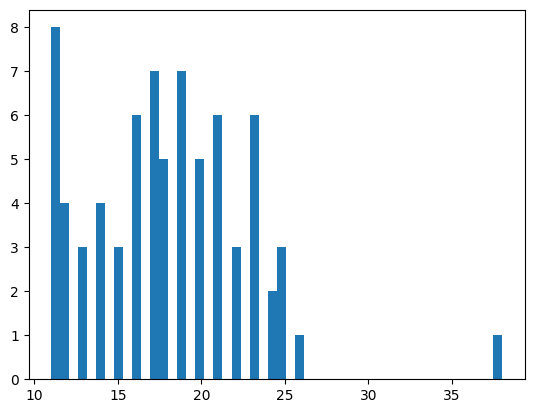

In [46]:
import matplotlib.pyplot as plt

sentence_counts = np.array(sentence_counts)
sentence_counts = sentence_counts[sentence_counts > 10]
plt.hist(sentence_counts, bins=50)
plt.show()

In [8]:
count_main_clauses_with_spacy("I want to do well I am sad")

(1, 0, 0)